In [1]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import typhon.arts.xml as axml
import typhon as ty
from copy import deepcopy
%matplotlib inline
ty.plots.styles.use()

In [2]:
abslookup_nolm_aer = axml.load('nolm_aer/abs_lookup.xml')
print(abslookup_nolm_aer.speciestags)
abslookup_nolm_hitran = axml.load('nolm_hitran/abs_lookup.xml')
print(abslookup_nolm_hitran.speciestags)
abslookup_lm = axml.load('lm_aer/abs_lookup.xml')
print(abslookup_lm.speciestags)
abslookup_nolm = abslookup_nolm_aer

[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-CIArotCKDMT252-*-*', 'N2-CIAfunCKDMT252-*-*'], ['O3-*-*-*'], ['O2-*-*-*', 'O2-CIAfunCKDMT100-*-*'], ['CO2-*-*-*', 'CO2-CKDMT252-*-*']]
[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-CIArotCKDMT252-*-*', 'N2-CIAfunCKDMT252-*-*'], ['O3-*-*-*'], ['O2-*-*-*', 'O2-CIAfunCKDMT100-*-*'], ['CO2-*-*-*', 'CO2-CKDMT252-*-*']]
[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-CIArotCKDMT252-*-*', 'N2-CIAfunCKDMT252-*-*'], ['O3-*-*-*'], ['O2-*-*-*', 'O2-CIAfunCKDMT100-*-*'], ['CO2-LM-*-*-*', 'CO2-CKDMT252-*-*']]


In [3]:
co2_lm = abslookup_lm.absorptioncrosssection[0, 3]
co2_nolm = abslookup_nolm.absorptioncrosssection[0, 3]

In [4]:
abslookup_diff = deepcopy(abslookup_nolm_aer)
abslookup_diff.absorptioncrosssection = np.abs(
    abslookup_nolm_aer.absorptioncrosssection - abslookup_nolm_hitran.absorptioncrosssection)
print(np.min(abslookup_diff.absorptioncrosssection))
print(np.max(abslookup_diff.absorptioncrosssection))

0.0
5.098653585115826e-22


CO2 cross sections with line mixing
--

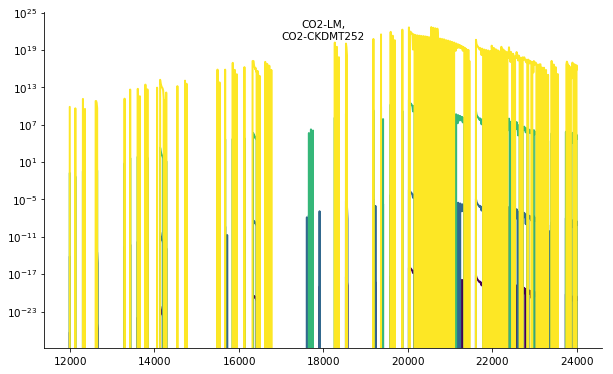

In [5]:
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_lm, [0, 10, 20, 40], species=[
                                      ['CO2-LM-*-*-*', 'CO2-CKDMT252-*-*']])

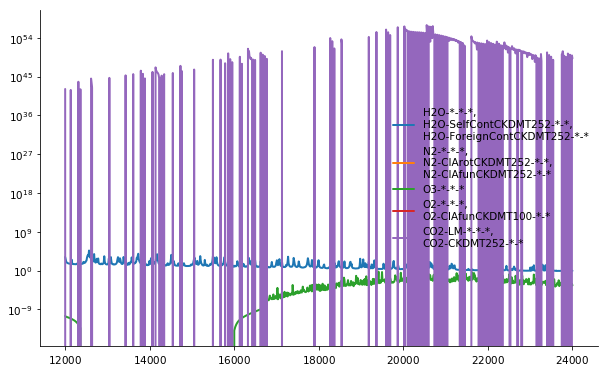

In [6]:
opacity = ty.plots.arts_lookup.calc_opacity_from_lookup(abslookup_lm)
ty.plots.arts_lookup.plot_lookup_opacity(abslookup_lm, opacity)

CO2 cross sections without line mixing
--

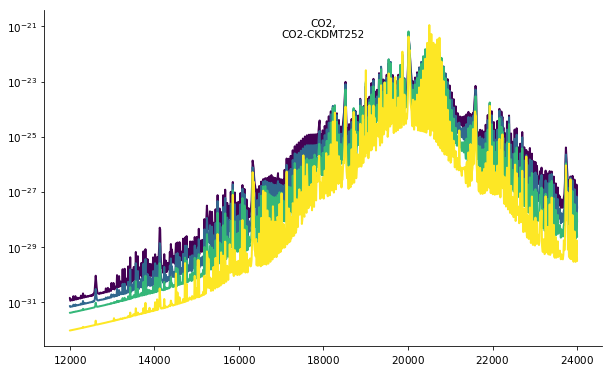

In [7]:
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_nolm, [0, 10, 20, 40], species=[
                                      ['CO2-*-*-*', 'CO2-CKDMT252-*-*']])

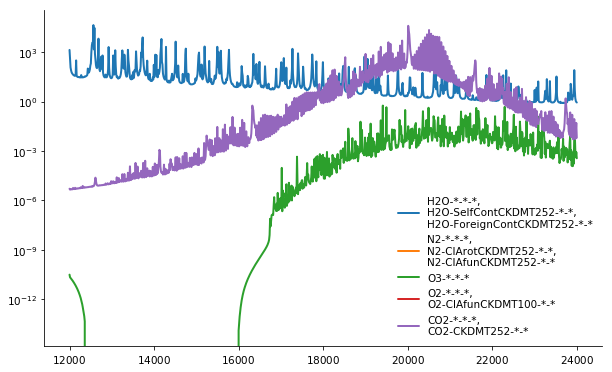

In [8]:
opacity = ty.plots.arts_lookup.calc_opacity_from_lookup(abslookup_nolm)
ty.plots.arts_lookup.plot_lookup_opacity(abslookup_nolm, opacity)

In [9]:
y_lm = axml.load('lm_aer/y.xml')
y_nolm_aer = axml.load('nolm_aer/y.xml')
y_nolm_hitran = axml.load('nolm_hitran/y.xml')
f = abslookup_nolm.frequencygrid

AER vs. HITRAN
--

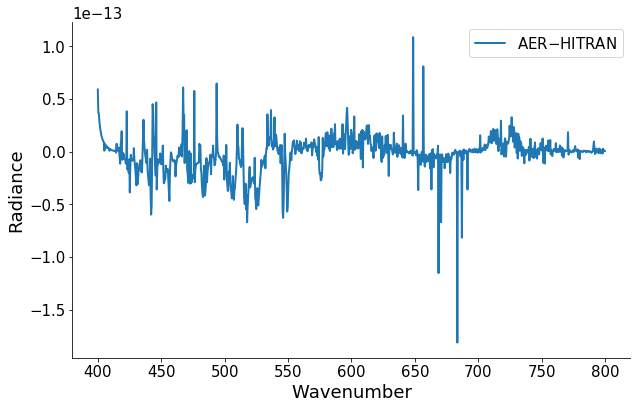

In [10]:
plt.plot(f/3e10, y_nolm_aer - y_nolm_hitran, label='AER$-$HITRAN')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

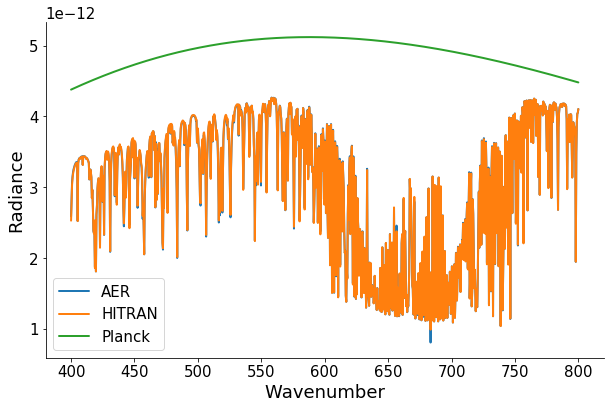

In [11]:
plt.plot(f/3e10, y_nolm_aer, label='AER')
plt.plot(f/3e10, y_nolm_hitran, label='HITRAN')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

No LineMixing vs. LineMixing
--

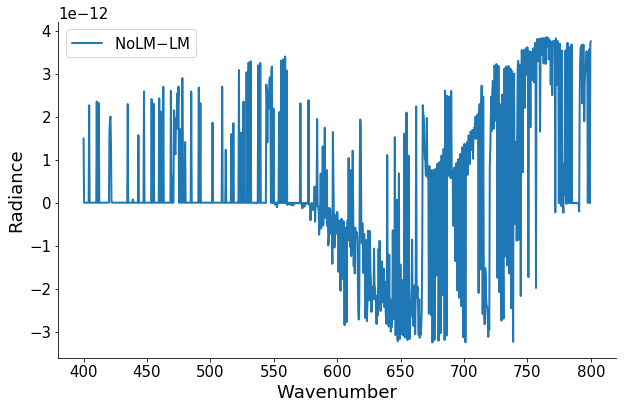

In [12]:
plt.plot(f/3e10, y_nolm_aer - y_lm, label='NoLM$-$LM')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

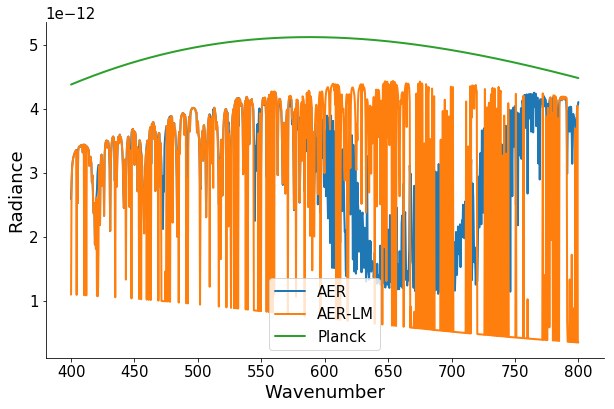

In [13]:
plt.plot(f/3e10, y_nolm_aer, label='AER')
plt.plot(f/3e10, y_lm, label='AER-LM')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()